In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
df_Titles=pd.read_csv('/content/drive/MyDrive/Social Media Files/reddit_immigration.csv',header=None,names=['start_date','Title','Score','ID','URL','Comments_Count','Date_created','Content'])


In [ ]:
df_Titles.head()

,start_date,Title,Score,ID,URL,Comments_Count,Date_created,Content
0,2024-04-08 00:11:23,How can I help my immigrant dad continue his c...,3,1byjrd0,https://www.reddit.com/r/Charlotte/comments/1b...,4,1.712535e+09,I have sponsored my dad for a green card last ...
1,2024-04-08 00:11:23,How can I help my immigrant dad continue his c...,3,1byjrd0,https://www.reddit.com/r/Charlotte/comments/1b...,4,1.712535e+09,I have sponsored my dad for a green card last ...
2,2024-04-08 00:06:04,How can I help my immigrant dad continue his c...,3,1byjn2p,https://www.reddit.com/r/careerguidance/commen...,0,1.712535e+09,I have sponsored my dad for a green card last ...
3,2024-04-08 00:11:23,How can I help my immigrant dad continue his c...,3,1byjrd0,https://www.reddit.com/r/Charlotte/comments/1b...,4,1.712535e+09,I have sponsored my dad for a green card last ...
4,2024-04-08 00:06:04,How can I help my immigrant dad continue his c...,3,1byjn2p,https://www.reddit.com/r/careerguidance/commen...,0,1.712535e+09,I have sponsored my dad for a green card last ...


In [ ]:
len(df_Titles)

6049

In [ ]:
df_Titles_processed=df_Titles.copy(deep=True)

In [ ]:
df_Titles_processed.drop_duplicates(inplace=True)

In [ ]:
df_Titles_processed.loc[:,'Title'].nunique()

94

In [ ]:
df_Titles_processed.head()

,start_date,Title,Score,ID,URL,Comments_Count,Date_created,Content
0,2024-04-08 00:11:23,How can I help my immigrant dad continue his c...,3,1byjrd0,https://www.reddit.com/r/Charlotte/comments/1b...,4,1.712535e+09,I have sponsored my dad for a green card last ...
2,2024-04-08 00:06:04,How can I help my immigrant dad continue his c...,3,1byjn2p,https://www.reddit.com/r/careerguidance/commen...,0,1.712535e+09,I have sponsored my dad for a green card last ...
5,2024-04-07 23:54:31,Is St. Louis/WashU hospital campus safe?,0,1byjdtt,https://www.reddit.com/r/StLouis/comments/1byj...,18,1.712534e+09,I am a neurologist in making who intends to mo...
9,2024-04-07 23:38:56,How do immigration agents verify the authentic...,0,1byj1kw,https://www.reddit.com/r/Banking/comments/1byj...,2,1.712533e+09,"Hello,\n\nI’m curious to know, how to immigrat..."
14,2024-04-07 23:06:54,Conspiracy theorists: A psychological portrait.,1,1byibo2,https://www.reddit.com/r/truthtellerinaction/c...,0,1.712531e+09,None of these findings should come as any surp...


In [ ]:
df_Titles_processed_v2=df_Titles_processed.copy(deep=True)
df_Titles_processed_v2=df_Titles_processed_v2.drop(columns=['Date_created'])

In [ ]:
df_Titles_processed_v2.head()

,start_date,Title,Score,ID,URL,Comments_Count,Content
0,2024-04-08 00:11:23,How can I help my immigrant dad continue his c...,3,1byjrd0,https://www.reddit.com/r/Charlotte/comments/1b...,4,I have sponsored my dad for a green card last ...
2,2024-04-08 00:06:04,How can I help my immigrant dad continue his c...,3,1byjn2p,https://www.reddit.com/r/careerguidance/commen...,0,I have sponsored my dad for a green card last ...
5,2024-04-07 23:54:31,Is St. Louis/WashU hospital campus safe?,0,1byjdtt,https://www.reddit.com/r/StLouis/comments/1byj...,18,I am a neurologist in making who intends to mo...
9,2024-04-07 23:38:56,How do immigration agents verify the authentic...,0,1byj1kw,https://www.reddit.com/r/Banking/comments/1byj...,2,"Hello,\n\nI’m curious to know, how to immigrat..."
14,2024-04-07 23:06:54,Conspiracy theorists: A psychological portrait.,1,1byibo2,https://www.reddit.com/r/truthtellerinaction/c...,0,None of these findings should come as any surp...


In [ ]:
df_Titles_processed_v2['Text_combined']=df_Titles_processed_v2['Title']+ ' ' + df_Titles_processed_v2['Content']

In [ ]:
df_Titles_processed_v2.drop(columns=['Title','URL','Content','start_date'],inplace=True)

In [ ]:
df_Titles_processed_v2.drop_duplicates(inplace=True)

In [ ]:
df_Titles_processed_v2=df_Titles_processed_v2.reset_index(drop=True)

In [ ]:
df_Titles_processed_v2.dropna(inplace=True)

In [ ]:
df_Titles_processed_v2

,Score,ID,Comments_Count,Text_combined
0,3,1byjrd0,4,How can I help my immigrant dad continue his c...
1,3,1byjn2p,0,How can I help my immigrant dad continue his c...
2,0,1byjdtt,18,Is St. Louis/WashU hospital campus safe? I am ...
3,0,1byj1kw,2,How do immigration agents verify the authentic...
4,1,1byibo2,0,Conspiracy theorists: A psychological portrait...
...,...,...,...,...
110,12,1bycl48,20,Do the immigration knows the flights I have wi...
111,19,1bybn5y,30,"For those of you planning on leaving pak , whe..."
112,3,1byb8t8,1,Want to relocate out of the USA. What are my o...
113,32,1byb74x,15,Want to relocate out of the USA. What are my o...


In [ ]:
df_Titles_processed_v3=df_Titles_processed_v2.loc[:,['ID','Text_combined']]

In [ ]:
df_Titles_processed_v3

,ID,Text_combined
0,1byjrd0,How can I help my immigrant dad continue his c...
1,1byjn2p,How can I help my immigrant dad continue his c...
2,1byjdtt,Is St. Louis/WashU hospital campus safe? I am ...
3,1byj1kw,How do immigration agents verify the authentic...
4,1byibo2,Conspiracy theorists: A psychological portrait...
...,...,...
110,1bycl48,Do the immigration knows the flights I have wi...
111,1bybn5y,"For those of you planning on leaving pak , whe..."
112,1byb8t8,Want to relocate out of the USA. What are my o...
113,1byb74x,Want to relocate out of the USA. What are my o...


In [ ]:
df_Titles2=pd.read_csv('/content/drive/MyDrive/Social Media Files/reddit_immigration1.csv',names=['start_date','Title','Score','ID','URL','Comments_Count','Date_created','Content'])

In [ ]:
df_Titles2=df_Titles2.loc[1:len(df_Titles2),:]

In [ ]:
df_Titles2

,start_date,Title,Score,ID,URL,Comments_Count,Date_created,Content
1,2024-04-09 18:13:59,Wrc croatia,2,1bzz0du,https://www.reddit.com/r/WRC/comments/1bzz0du/...,0,1712686439.0,Looking to see if anyone else from USA is goin...
2,2024-04-09 18:13:59,Wrc croatia,2,1bzz0du,https://www.reddit.com/r/WRC/comments/1bzz0du/...,0,1712686439.0,Looking to see if anyone else from USA is goin...
3,2024-04-09 18:13:35,Looking for Job Opportunities,1,1bzz01h,https://www.reddit.com/r/jobpostings/comments/...,0,1712686415.0,"Hello Everyone,\n\nI am currently pursuing mas..."
4,2024-04-09 18:13:59,Wrc croatia,2,1bzz0du,https://www.reddit.com/r/WRC/comments/1bzz0du/...,0,1712686439.0,Looking to see if anyone else from USA is goin...
5,2024-04-09 18:13:35,Looking for Job Opportunities,1,1bzz01h,https://www.reddit.com/r/jobpostings/comments/...,0,1712686415.0,"Hello Everyone,\n\nI am currently pursuing mas..."
...,...,...,...,...,...,...,...,...
50096,2024-04-09 17:14:51,Learning Dutch classes/book recommendations fo...,1,1bzxkag,https://www.reddit.com/r/learndutch/comments/1...,0,1712682891.0,Hi I am interested in learning Dutch... I can ...
50097,2024-04-09 17:14:03,/u/wreckitdeanna [REQ] was deleted from /r/bor...,1,1bzxjlc,https://www.reddit.com/r/borrowdeletes/comment...,1,1712682843.0,/u/wreckitdeanna deleted from /r/borrow \n\n* ...
50098,2024-04-09 17:13:17,Recommendation Dilemma,7,1bzxiwe,https://www.reddit.com/r/Professors/comments/1...,5,1712682797.0,"Hi There,\n\n&#x200B;\n\nI'm a professor at a ..."
50099,2024-04-09 17:12:59,YA fiction about a girl with the magical power...,2,1bzxinl,https://www.reddit.com/r/whatsthatbook/comment...,0,1712682779.0,"Okay, so I read this book 30 years ago and I r..."


In [ ]:
len(df_Titles2)

50100

In [ ]:
df_Titles2_processed=df_Titles2.copy(deep=True)

In [ ]:
df_Titles2_processed.drop_duplicates(inplace=True)

In [ ]:
df_Titles2_processed.loc[:,'Title'].nunique()

115

In [ ]:
df_Titles2_processed.reset_index(drop=True,inplace=True)

In [ ]:
df_Titles2_processed

,start_date,Title,Score,ID,URL,Comments_Count,Date_created,Content
0,2024-04-09 18:13:59,Wrc croatia,2,1bzz0du,https://www.reddit.com/r/WRC/comments/1bzz0du/...,0,1712686439.0,Looking to see if anyone else from USA is goin...
1,2024-04-09 18:13:35,Looking for Job Opportunities,1,1bzz01h,https://www.reddit.com/r/jobpostings/comments/...,0,1712686415.0,"Hello Everyone,\n\nI am currently pursuing mas..."
2,2024-04-09 18:13:26,Thoughts on major switch as a non-traditional ...,1,1bzyzxa,https://www.reddit.com/r/college/comments/1bzy...,0,1712686406.0,USA Based. \n\nI am currently a non-traditiona...
3,2024-04-09 18:10:30,Hourly rate,2,1bzyxav,https://www.reddit.com/r/filemaker/comments/1b...,0,1712686230.0,What is average hourly rate of senior filemake...
4,2024-04-09 18:10:09,Mystery Movie Monday Megathread - April 15 2024,1,1bzywx4,https://www.reddit.com/r/RegalUnlimited/commen...,1,1712686209.0,Discuss your predictions here. All posts made ...
...,...,...,...,...,...,...,...,...
149,2024-04-09 17:24:12,Truth about Warren Buffett,0,1bzxsch,https://www.reddit.com/r/investing/comments/1b...,28,1712683452.0,While I admire the brilliance of Warren Buffet...
150,2024-04-09 17:20:04,Message from the NY Hall of Science,24,1bzxot0,https://i.redd.it/jvk57o3dmhtc1.jpeg,1,1712683204.0,NaN
151,2024-04-09 17:20:03,Do you really have wild turkeys?,11,1bzxoso,https://www.reddit.com/r/Hunting/comments/1bzx...,49,1712683203.0,"Hey guys, it's a genuine question, do you actu..."
152,2024-04-09 17:13:17,Recommendation Dilemma,7,1bzxiwe,https://www.reddit.com/r/Professors/comments/1...,5,1712682797.0,"Hi There,\n\n&#x200B;\n\nI'm a professor at a ..."


In [ ]:
df_Titles2_processed_v2=df_Titles2_processed.copy(deep=True)

In [ ]:
df_Titles2_processed_v2.head()

,start_date,Title,Score,ID,URL,Comments_Count,Date_created,Content
0,2024-04-09 18:13:59,Wrc croatia,2,1bzz0du,https://www.reddit.com/r/WRC/comments/1bzz0du/...,0,1712686439.0,Looking to see if anyone else from USA is goin...
1,2024-04-09 18:13:35,Looking for Job Opportunities,1,1bzz01h,https://www.reddit.com/r/jobpostings/comments/...,0,1712686415.0,"Hello Everyone,\n\nI am currently pursuing mas..."
2,2024-04-09 18:13:26,Thoughts on major switch as a non-traditional ...,1,1bzyzxa,https://www.reddit.com/r/college/comments/1bzy...,0,1712686406.0,USA Based. \n\nI am currently a non-traditiona...
3,2024-04-09 18:10:30,Hourly rate,2,1bzyxav,https://www.reddit.com/r/filemaker/comments/1b...,0,1712686230.0,What is average hourly rate of senior filemake...
4,2024-04-09 18:10:09,Mystery Movie Monday Megathread - April 15 2024,1,1bzywx4,https://www.reddit.com/r/RegalUnlimited/commen...,1,1712686209.0,Discuss your predictions here. All posts made ...


In [ ]:
df_Titles2_processed_v2['Text_combined']=df_Titles2_processed_v2['Title']+' ' + df_Titles2_processed_v2['Content']

In [ ]:
df_Titles2_processed_v2.drop(columns=['Title','URL','Content','start_date','Date_created'],inplace=True)

In [ ]:
df_Titles2_processed_v2.drop_duplicates(inplace=True)

In [ ]:
df_Titles2_processed_v2=df_Titles2_processed_v2.reset_index(drop=True)

In [ ]:
df_Titles2_processed_v2.dropna(inplace=True)

In [ ]:
df_Titles2_processed_v2

,Score,ID,Comments_Count,Text_combined
0,2,1bzz0du,0,Wrc croatia Looking to see if anyone else from...
1,1,1bzz01h,0,"Looking for Job Opportunities Hello Everyone,..."
2,1,1bzyzxa,0,Thoughts on major switch as a non-traditional ...
3,2,1bzyxav,0,Hourly rate What is average hourly rate of sen...
4,1,1bzywx4,1,Mystery Movie Monday Megathread - April 15 202...
...,...,...,...,...
148,3,1bzxsmo,4,[Streaming] Will Paramount+ (and Star Trek) su...
149,0,1bzxsch,28,Truth about Warren Buffett While I admire the ...
151,11,1bzxoso,49,"Do you really have wild turkeys? Hey guys, it'..."
152,7,1bzxiwe,5,"Recommendation Dilemma Hi There,\n\n&#x200B;\n..."


In [ ]:
df_Titles2_processed_v3=df_Titles2_processed_v2.loc[:,['ID','Text_combined']]

In [ ]:
df_Titles2_processed_v3

,ID,Text_combined
0,1bzz0du,Wrc croatia Looking to see if anyone else from...
1,1bzz01h,"Looking for Job Opportunities Hello Everyone,..."
2,1bzyzxa,Thoughts on major switch as a non-traditional ...
3,1bzyxav,Hourly rate What is average hourly rate of sen...
4,1bzywx4,Mystery Movie Monday Megathread - April 15 202...
...,...,...
148,1bzxsmo,[Streaming] Will Paramount+ (and Star Trek) su...
149,1bzxsch,Truth about Warren Buffett While I admire the ...
151,1bzxoso,"Do you really have wild turkeys? Hey guys, it'..."
152,1bzxiwe,"Recommendation Dilemma Hi There,\n\n&#x200B;\n..."


In [ ]:
df_comments=pd.read_csv('/content/drive/MyDrive/Social Media Files/reddit_immigration_comments.csv',header=None,names=['start_date','ID','Text_combined','Pseudo_name'])

In [ ]:
df_comments_v1=df_comments.copy(deep=True)

In [ ]:
df_comments_v1.head()

,start_date,ID,Text_combined,Pseudo_name
0,2024-04-08 01:24:30,kyk13h1,I don’t believe any of those degrees are trans...,konto81
1,2024-04-08 01:37:14,kyk2zy2,Have you hired an immigration attorney yet? Th...,oxymoronic-thoughts
2,2024-04-08 01:42:24,kyk3rr2,"If by ""the hockey team"" you mean he was on the...",BrodysBootlegs
3,2024-04-08 00:20:53,kyjrhkk,Yes they're safe. Exceptions to the norm are n...,I_read_all_wikipedia
4,2024-04-08 00:07:31,kyjpg9r,Yes it’s safe,Funny_Beautiful_6958


In [ ]:
len(df_comments_v1)

7915

In [ ]:
df_comments_v1.drop(columns=['start_date','Pseudo_name'],inplace=True)

In [ ]:
df_comments_v1.drop_duplicates(inplace=True)

In [ ]:
len(df_comments_v1)

7568

In [ ]:
df_comments_v1.reset_index(drop=True,inplace=True)

In [ ]:
df_comments_v1.head()

,ID,Text_combined
0,kyk13h1,I don’t believe any of those degrees are trans...
1,kyk2zy2,Have you hired an immigration attorney yet? Th...
2,kyk3rr2,"If by ""the hockey team"" you mean he was on the..."
3,kyjrhkk,Yes they're safe. Exceptions to the norm are n...
4,kyjpg9r,Yes it’s safe


In [ ]:
df_reddit_usa=df_Titles_processed_v3._append(df_Titles2_processed_v3,ignore_index=True)
df_reddit_usa=df_reddit_usa._append(df_comments_v1,ignore_index=True)

In [ ]:
len(df_reddit_usa)

7807

In [ ]:
df_reddit_usa.reset_index(drop=True,inplace=True)

In [ ]:
df_reddit_usa

,ID,Text_combined
0,1byjrd0,How can I help my immigrant dad continue his c...
1,1byjn2p,How can I help my immigrant dad continue his c...
2,1byjdtt,Is St. Louis/WashU hospital campus safe? I am ...
3,1byj1kw,How do immigration agents verify the authentic...
4,1byibo2,Conspiracy theorists: A psychological portrait...
...,...,...
7802,kyk6d21,Agreed. I know a guy who did this to migrate f...
7803,kyjspxe,The part of STL where WUSTL Med is located (Ce...
7804,kyk4c46,"Thanks, I got rid of that part of the post."
7805,kyk4696,Yes and they probably know this account is tie...


In [ ]:
import re
import unicodedata
from nltk.stem import PorterStemmer, SnowballStemmer

stop_words = []

with open('/content/drive/MyDrive/Social Media Files/SmartStoplist.txt', "r") as f:
    for line in f:
        stop_words.extend(line.split())

stop_words = stop_words

def pre_processor(text):
    # Removing emojis
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Remove newline characters
    text = text.replace('\n', ' ')

    # Remove URLs
    text = re.sub(r'https?:\/\/\S+', '', text)

    # Removing non-alphanumeric characters and extra whitespaces for people commenting in diffrernt langauges
    # The logic is if it's in ASCII then dont remove it otherwise remove
    text = re.sub(r'[^\w\s,]', '', text)

    # Remove non-ASCII
    text = ''.join(character for character in text if unicodedata.category(character)[0] == 'L' or character == ' ')

    # Remove multiple whitespaces and strip leading/trailing whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    #regular expression keeping only letters
    letters_only_text = re.sub("[^a-zA-Z]", " ", text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out

    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)

    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)

    # converting list back to string
    return " ".join(stemmed_words)

In [ ]:
df_reddit_usa['refined_text']=df_reddit_usa['Text_combined'].apply(pre_processor)

In [ ]:
df_reddit_usa.head()

,ID,Text_combined,refined_text
0,1byjrd0,How can I help my immigrant dad continue his c...,immigr dad continu career usa sponsor dad gree...
1,1byjn2p,How can I help my immigrant dad continue his c...,immigr dad continu career usa sponsor dad gree...
2,1byjdtt,Is St. Louis/WashU hospital campus safe? I am ...,st louiswashu hospit campu safe neurologist ma...
3,1byj1kw,How do immigration agents verify the authentic...,immigr agent verifi authent bank statement cur...
4,1byibo2,Conspiracy theorists: A psychological portrait...,conspiraci theorist psycholog portrait find su...


In [ ]:
import re
import unicodedata
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

stop_words = []

with open('/content/drive/MyDrive/Social Media Files/SmartStoplist.txt', "r") as f:
    for line in f:
        stop_words.extend(line.split())

stop_words = stop_words

def pre_processor_lem(text):
    # Removing emojis
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Remove newline characters
    text = text.replace('\n', ' ')

    # Remove URLs
    text = re.sub(r'https?:\/\/\S+', '', text)

    # Removing non-alphanumeric characters and extra whitespaces for people commenting in diffrernt langauges
    # The logic is if it's in ASCII then dont remove it otherwise remove
    text = re.sub(r'[^\w\s,]', '', text)

    # Remove non-ASCII
    text = ''.join(character for character in text if unicodedata.category(character)[0] == 'L' or character == ' ')

    # Remove multiple whitespaces and strip leading/trailing whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    #regular expression keeping only letters
    letters_only_text = re.sub("[^a-zA-Z]", " ", text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = WordNetLemmatizer() #plug in here any other stemmer or lemmatiser you want to try out

    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)

    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.lemmatize(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)

    # converting list back to string
    return " ".join(stemmed_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df_reddit_usa_v3=df_reddit_usa.copy(deep=True)

In [ ]:
df_reddit_usa_v3['refined_text']=df_reddit_usa_v3['Text_combined'].apply(pre_processor_lem)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


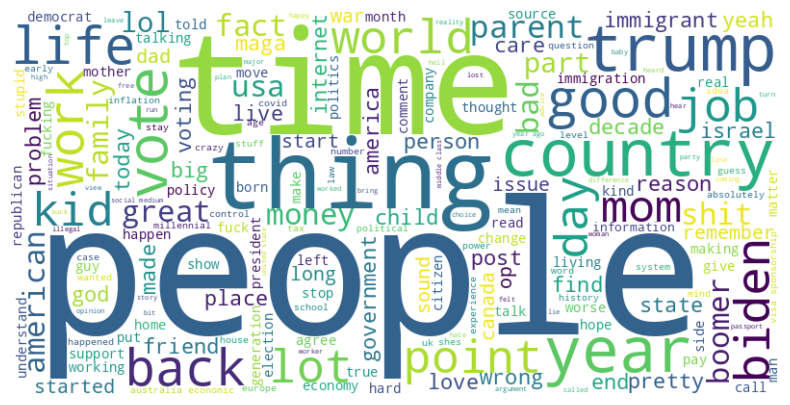

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join the different processed titles together.
long_string = ','.join(list(df_reddit_usa_v3['refined_text'].values))

# Create a WordCloud object
#wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='virdis')

# Generate a word cloud
wordcloud=WordCloud(width=800, height=400, background_color ='white').generate(long_string)

# Visualize the word cloud

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#wordcloud.to_image()

In [ ]:
wordcloud.to_file('overall_wc.png')

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

#opting for lamentizer instead of stemmer
data = df_reddit_usa_v3.refined_text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['immigrant', 'dad', 'continue', 'career', 'usa', 'sponsored', 'dad', 'green', 'card', 'year', 'expecting', 'fall', 'dad', 'russia', 'year', 'massage', 'therapist', 'year', 'hockey', 'team', 'opened', 'practice', 'recently', 'nursing', 'degree', 'required', 'massage', 'therapist', 'russia', 'bc']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
dictionary = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 3), (17, 3), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1)]


In [ ]:
from pprint import pprint
from gensim.models import LdaMulticore
# number of topics
num_topics = 6
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=20))
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.007*"like" + 0.007*"thing" + 0.007*"country" + 0.006*"people" + '
  '0.006*"time" + 0.005*"job" + 0.005*"year" + 0.005*"internet" + 0.005*"god" '
  '+ 0.005*"eclipse" + 0.004*"great" + 0.004*"good" + 0.004*"government" + '
  '0.003*"back" + 0.003*"work" + 0.003*"reason" + 0.003*"life" + 0.003*"world" '
  '+ 0.003*"solar" + 0.003*"visa"'),
 (1,
  '0.013*"like" + 0.008*"thing" + 0.007*"time" + 0.006*"people" + '
  '0.005*"country" + 0.004*"work" + 0.004*"lot" + 0.004*"year" + 0.004*"back" '
  '+ 0.004*"bad" + 0.004*"life" + 0.003*"pretty" + 0.003*"vote" + '
  '0.003*"american" + 0.003*"world" + 0.003*"money" + 0.003*"deleted" + '
  '0.003*"good" + 0.003*"parent" + 0.003*"kid"'),
 (2,
  '0.013*"people" + 0.012*"like" + 0.007*"thing" + 0.007*"trump" + '
  '0.007*"vote" + 0.006*"country" + 0.005*"time" + 0.005*"year" + '
  '0.004*"parent" + 0.004*"job" + 0.004*"yeah" + 0.004*"kid" + 0.004*"back" + '
  '0.003*"lot" + 0.003*"work" + 0.003*"end" + 0.003*"good" + 0.003*"day" + '
  '0.

In [ ]:
# using u_mass here to account for coherence within model rather than external, a negative score indicates better coherance and even better topics
from gensim.models.coherencemodel import CoherenceModel
# Calculate Model Coherence
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()

print('Coherence Score: ', coherence_lda)

Coherence Score:  -2.6751972029301148


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.1 MB/s eta 0:00:00


In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/drive/MyDrive/Social Media Files/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/drive/MyDrive/Social Media Files/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.006527  0.000852       1        1  23.570137
5     -0.004538 -0.030006       2        1  19.910138
3      0.017773 -0.041922       3        1  18.818895
4      0.012476  0.048771       4        1  14.104228
0     -0.067097  0.007676       5        1  12.142122
1      0.034858  0.014629       6        1  11.454479, topic_info=           Term        Freq       Total Category  logprob  loglift
2844    eclipse  130.000000  130.000000  Default  30.0000  30.0000
6536   internet  267.000000  267.000000  Default  29.0000  29.0000
3568    deleted   61.000000   61.000000  Default  28.0000  28.0000
1342       vote  413.000000  413.000000  Default  27.0000  27.0000
29    immigrant  330.000000  330.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
24         good   50.120303  620.802995   Topic6  -5.8172  -0.3498
230         job   44.625576  509.236729   Topic6  -5.9333  -0.2678
1344       yeah   37.946195  266.079046   Topic6  -6.0955   0.2192
1031      trump   39.348731  513.743231   Topic6  -6.0592  -0.4025
542         day   38.133859  424.354562   Topic6  -6.0906  -0.2427

[517 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1532      1  0.066379   accent
1532      2  0.110632   accent
1532      3  0.110632   accent
1532      4  0.110632   accent
1532      5  0.132758   accent
...     ...       ...      ...
409       2  0.137444  zealand
409       3  0.687220  zealand
409       4  0.045815  zealand
409       5  0.045815  zealand
409       6  0.091629  zealand

[1414 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 4, 5, 1, 2])

In [ ]:
texts=df_reddit_usa_v3['refined_text'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
texts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['immigrant dad continue career usa sponsored dad green card year expecting fall dad russia year massage therapist year hockey team opened practice recently nursing degree required massage therapist russia bc law passed year ago master degree physical education graduated continue helping adult kid athlete massagephysical therapy teaching kid hockey opening practice like russia recommendationadvice proceed like education occupational therapist occupational therapy assistant massage therapist time wondering current degree transfer acceptable licensed agency expect english good asked start learning taking class prepared atleast year located charlotte nc advice personal experience welcomed',
 'immigrant dad continue career usa sponsored dad green card year expecting fall dad russia year massage therapist year hockey team opened practice recently nursing degree required massage therapist russia bc law passed year ago master degree physical education graduated continue helping adult kid athl

In [ ]:
pip install textblob

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_reddit_usa_v2=df_reddit_usa_v3.copy(deep=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_reddit_usa_v2.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['ID', 'Text_combined', 'refined_text'], dtype='object')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


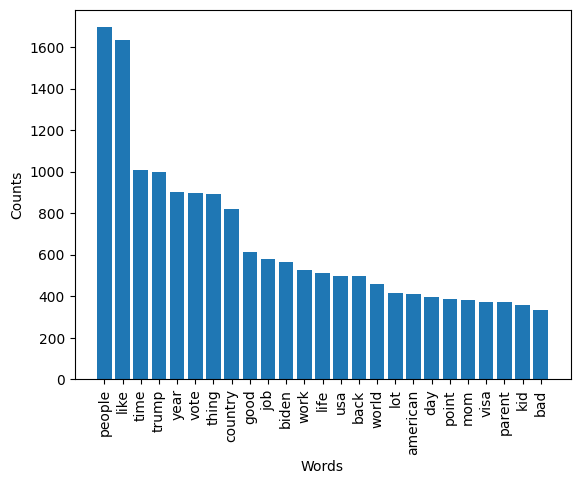

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

words = [word for line in df_reddit_usa_v2['refined_text'] for word in line.split()]
word_counts = Counter(words)

most_common_words = word_counts.most_common(25)
words, counts = zip(*most_common_words)

plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

def get_sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity/(1 if len(text)==0 else len(text))
def get_sentiment_subjectivity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.subjectivity/(1 if len(text)==0 else len(text))

df_reddit_usa_v2['sentiment'] = df_reddit_usa_v2['refined_text'].apply(get_sentiment)
df_reddit_usa_v2['sentiment_score'] = df_reddit_usa_v2['refined_text'].apply(get_sentiment_score)
df_reddit_usa_v2['sentiment_sensitivity'] = df_reddit_usa_v2['refined_text'].apply(get_sentiment_subjectivity)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_reddit_usa_v2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Text_combined,refined_text,sentiment,sentiment_score,sentiment_sensitivity
0,1byjrd0,How can I help my immigrant dad continue his c...,immigrant dad continue career usa sponsored da...,positive,0.000108,0.000414
1,1byjn2p,How can I help my immigrant dad continue his c...,immigrant dad continue career usa sponsored da...,positive,0.000108,0.000414
2,1byjdtt,Is St. Louis/WashU hospital campus safe? I am ...,st louiswashu hospital campus safe neurologist...,negative,-0.000632,0.001664
3,1byj1kw,How do immigration agents verify the authentic...,immigration agent verify authenticity bank sta...,positive,0.000273,0.000915
4,1byibo2,Conspiracy theorists: A psychological portrait...,conspiracy theorist psychological portrait fin...,positive,0.000009,0.000165
...,...,...,...,...,...,...
7802,kyk6d21,Agreed. I know a guy who did this to migrate f...,agreed guy migrate canada year guy owns ton re...,neutral,0.000000,0.000000
7803,kyjspxe,The part of STL where WUSTL Med is located (Ce...,part stl wustl med located central west end sa...,negative,-0.000500,0.002917
7804,kyk4c46,"Thanks, I got rid of that part of the post.",rid part post,neutral,0.000000,0.000000
7805,kyk4696,Yes and they probably know this account is tie...,account tied,neutral,0.000000,0.000000


In [ ]:
print(f"Average Polarity across all documents: {df_reddit_usa_v2['sentiment_score'].mean()}")
print(f"Average Subjectivity across all documents: {df_reddit_usa_v2['sentiment_sensitivity'].mean()}")

Average Polarity across all documents: 0.0013718881662486276
Average Subjectivity across all documents: 0.008620290167113163


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
type(df_reddit_usa_v2['sentiment_sensitivity'].mean())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


numpy.float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


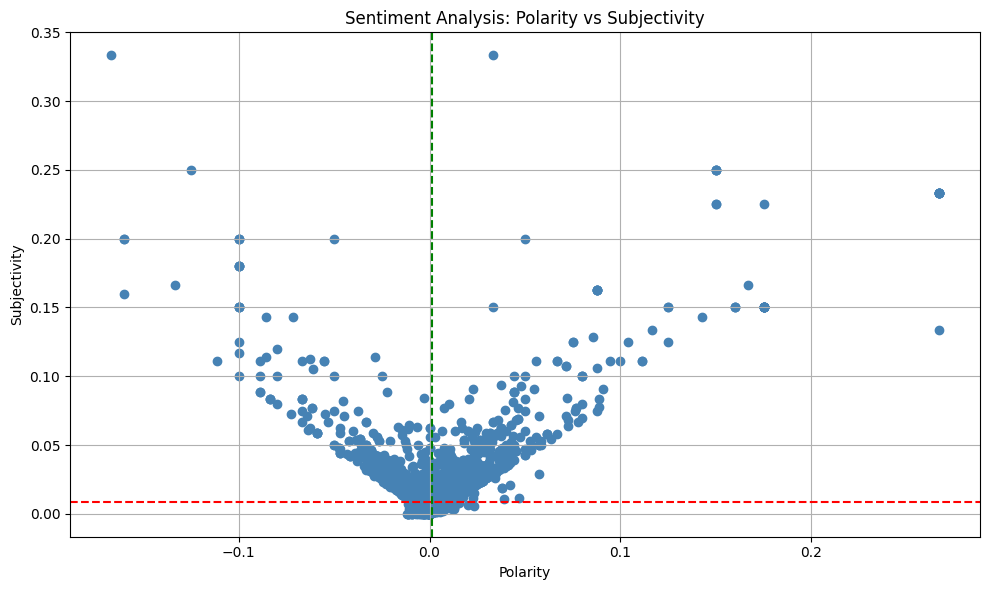

In [ ]:
import matplotlib.pyplot as plt

# Extract polarity and subjectivity scores for plotting
polarities = df_reddit_usa_v2['sentiment_score'].tolist()
subjectivities = df_reddit_usa_v2['sentiment_sensitivity'].tolist()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(polarities, subjectivities,color='steelblue')

# Customize the plot
plt.title('Sentiment Analysis: Polarity vs Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.axhline(y=df_reddit_usa_v2['sentiment_sensitivity'].mean(), color='r', linestyle='--', label='Average Subjectivity')
plt.axvline(x=df_reddit_usa_v2['sentiment_score'].mean(), color='g', linestyle='--', label='Average Polarity')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()



In [ ]:
j=0
for i in df_reddit_usa_v2['sentiment_sensitivity']:
  if i>=0.1:
    j+=1
print(j)

98


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
j=0
for i in df_reddit_usa_v2['sentiment_score']:
  if i>=0.1 or i<=-0.1:
    j+=1
print(j)

56


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(df_reddit_usa_v2['sentiment_score'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7807

In [ ]:
texts=df_reddit_usa_v3['refined_text'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Sentiment-Bearing Words anlaysis
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

def identify_sentiment_words(tokens):
    sentiment_words = {'positive': [], 'negative': []}

    # Join tokens into a string if necessary
    text = ' '.join(tokens)  # Assuming `tokens` is a list of tokens (words)
    sentences = sent_tokenize(text)
    for sentence in sentences:
        words = word_tokenize(sentence)
        for word in words:
            word_score = sia.polarity_scores(word)['compound']
            sentence_score = sia.polarity_scores(sentence)['compound']

            if word_score > 0.00000001 and sentence_score > 0.00000001:
                sentiment_words['positive'].append(word)
            elif word_score < -0.00000001 and sentence_score < -0.00000001:
                sentiment_words['negative'].append(word)

    return sentiment_words

def identify_sentiment_words_direct(tokens):
    sentiment_words = {'positive': [], 'negative': []}

    for word in tokens:
        word_score = sia.polarity_scores(word)['compound']

        if word_score > 0.00000001:
            sentiment_words['positive'].append(word)
        elif word_score < 0.00000001:
            sentiment_words['negative'].append(word)

    return sentiment_words

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from nltk.tokenize import word_tokenize

all_positive_words = []
all_negative_words = []

#list of set removes double counts
sentiment_words = identify_sentiment_words(list(set(word_tokenize(texts[100]))))
all_positive_words.extend(sentiment_words['positive'])
all_negative_words.extend(sentiment_words['negative'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from nltk.tokenize import word_tokenize
words_tokens = []
for n in texts:
    words_tokens.extend(word_tokenize(n))
words_tokens_unique = list(set(words_tokens))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sentiment_words = identify_sentiment_words(words_tokens_unique[1:2000])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sentiment_words2=identify_sentiment_words_direct(words_tokens_unique[1:2000])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sentiment_words3=identify_sentiment_words_direct(words_tokens[1:2000])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def negative_cmap():
    colors = [(1, 0, 0), (0.5, 0, 0)]  # Start and end color: red with lower green and blue
    cmap_name = 'red_gradient'
    return LinearSegmentedColormap.from_list(cmap_name, colors)

def positive_cmap():
    colors = [(0, 1, 0), (0, 0, 1)]  # Start color: green, End color: blue
    cmap_name = 'green_to_blue'
    return LinearSegmentedColormap.from_list(cmap_name, colors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


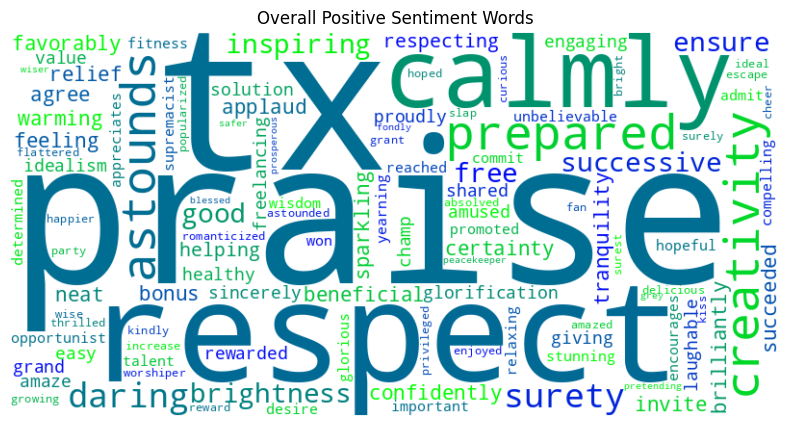

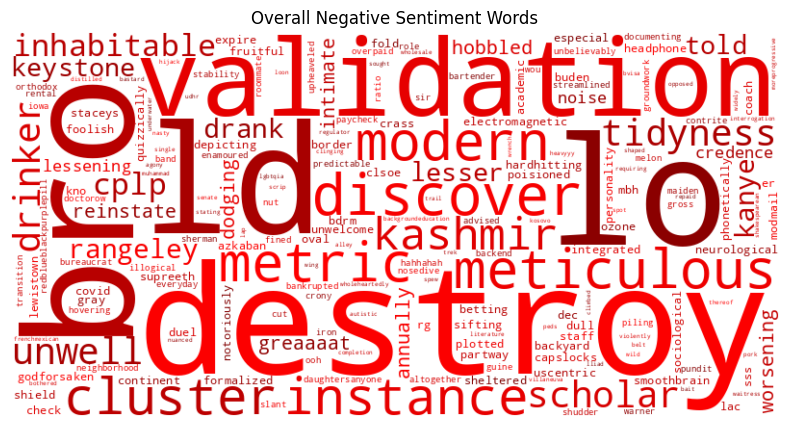

In [ ]:
# word clouds for positive and negative words
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(word_list, title,color_opt):
    word_cloud_text = ' '.join(word_list)
    word_cloud = WordCloud(width=800, height=400, background_color='white',colormap=color_opt).generate(word_cloud_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for aggregated positive and negative words
generate_word_cloud(sentiment_words2['positive'], "Overall Positive Sentiment Words",positive_cmap())
generate_word_cloud(sentiment_words2['negative'], "Overall Negative Sentiment Words",negative_cmap())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


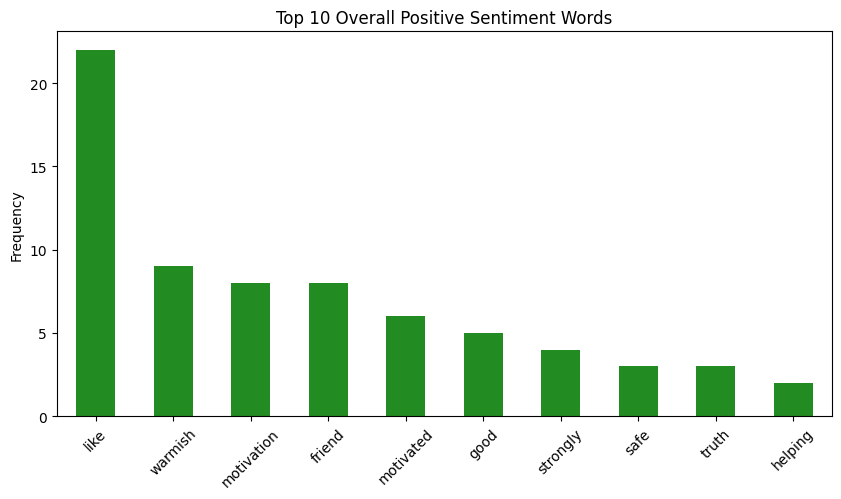

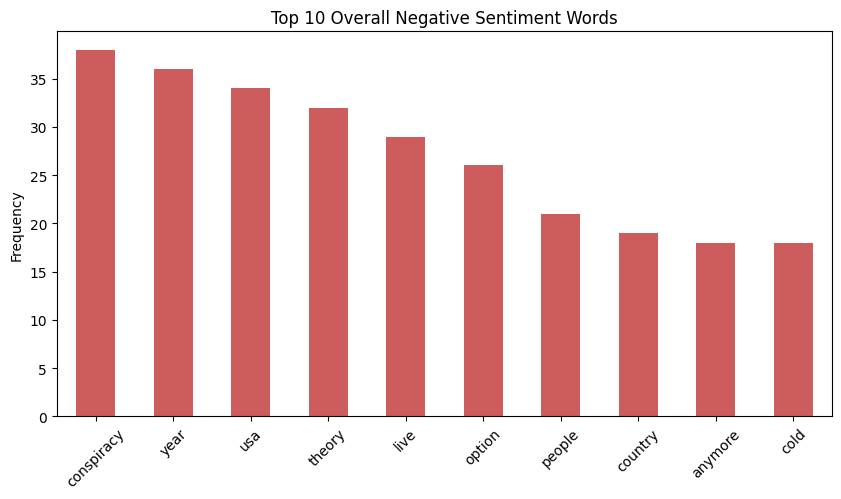

In [ ]:
import pandas as pd

def generate_bar_chart_for_top_words(word_list, title, color):
    word_counts = pd.Series(word_list).value_counts().head(10)
    word_counts.plot(kind='bar', color=color, figsize=(10, 5))
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Generate bar charts for top 5 aggregated positive and negative words
generate_bar_chart_for_top_words(sentiment_words3['positive'], "Top 10 Overall Positive Sentiment Words", "forestgreen")
generate_bar_chart_for_top_words(sentiment_words3['negative'], "Top 10 Overall Negative Sentiment Words", "indianred")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


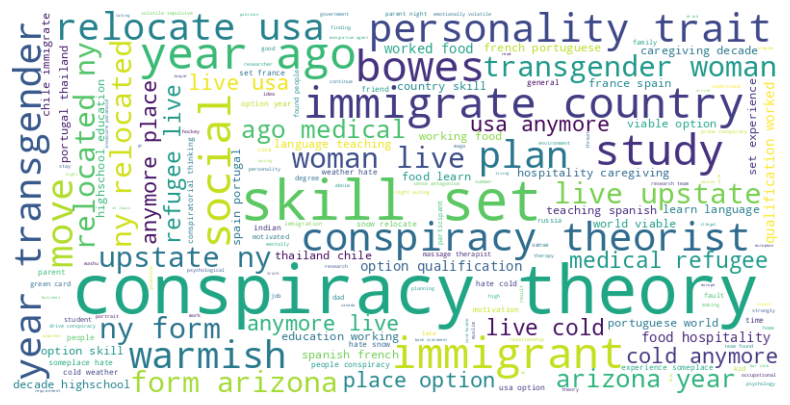

In [ ]:
#visualize with worldcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for the first document
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(sentiment_words3['negative']+sentiment_words3['positive']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
